In [1]:
%matplotlib notebook
import numpy as np
import sigpy as sp
import sigpy.mri as mr
import sigpy.mri.rf as rf
import sigpy.plot as pl
import scipy.signal as signal
import matplotlib.pyplot as pyplot

In [2]:
n = 1176
dt = 4e-6
dw0 = 100*np.pi/dt/n
beta = 10
kappa = np.arctan(20)
flip = np.pi/4
[am_bir, om_bir] = rf.adiabatic.bir4(n, beta, kappa, flip, dw0)

<IPython.core.display.Javascript object>


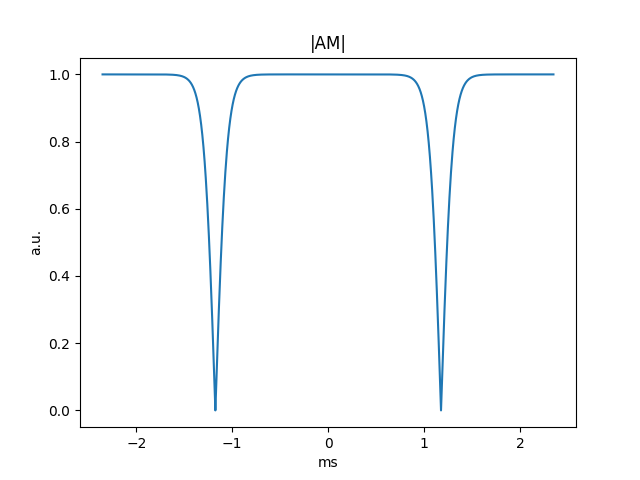

<IPython.core.display.Javascript object>


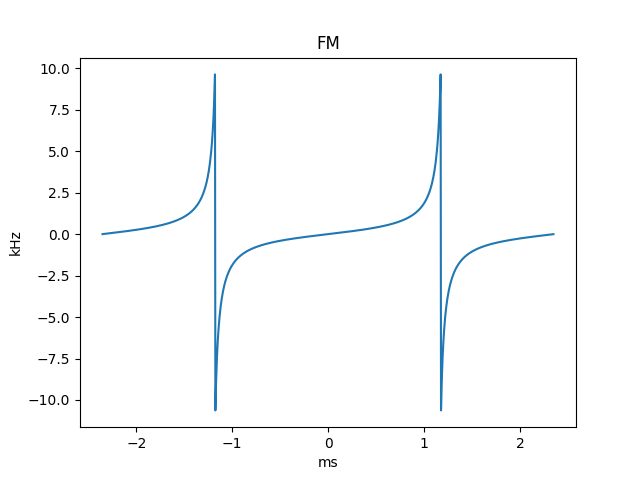

Text(0.5, 1.0, 'FM')

In [3]:
T = n*dt
t = np.arange(-T/2,T/2,dt)*1000
pyplot.figure()
pyplot.plot(t, np.abs(am_bir))
pyplot.xlabel('ms')
pyplot.ylabel('a.u.')
pyplot.title('|AM|')
pyplot.figure()
pyplot.plot(t, om_bir/(2*np.pi*1000))
pyplot.xlabel('ms')
pyplot.ylabel('kHz')
pyplot.title('FM')

<IPython.core.display.Javascript object>


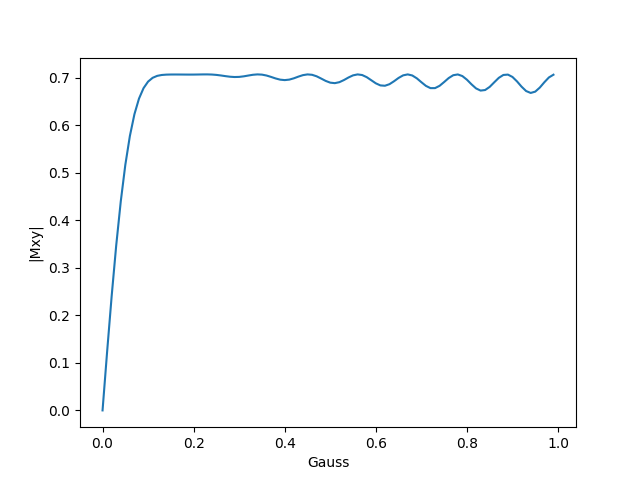

Text(0, 0.5, '|Mxy|')

In [5]:
b1 = np.arange(0, 1, 0.01) # b1 grid we simulate the pulse over, Gauss
b1 = np.reshape(b1, (np.size(b1),1))
a = np.zeros(np.shape(b1), dtype = 'complex')
b = np.zeros(np.shape(b1), dtype = 'complex')
for ii in range(0, np.size(b1)):
    [a[ii], b[ii]] = rf.sim.abrmnd(2*np.pi*dt*4258*b1[ii]*am_bir, np.ones(1), dt*np.reshape(om_bir,(np.size(om_bir),1)))
Mxy = 2*np.multiply(np.conj(a), b)
pyplot.figure()
pyplot.plot(b1, np.abs(Mxy))
pyplot.xlabel('Gauss')
pyplot.ylabel('|Mxy|')

In [6]:
n = 512
beta = 800
mu = 4.9
T = 0.012
[am_sech, om_sech] = rf.adiabatic.hypsec(n, beta, mu, T)


<IPython.core.display.Javascript object>


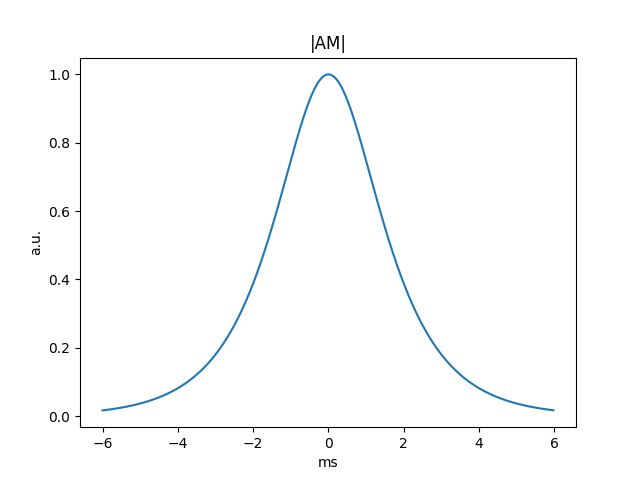

<IPython.core.display.Javascript object>


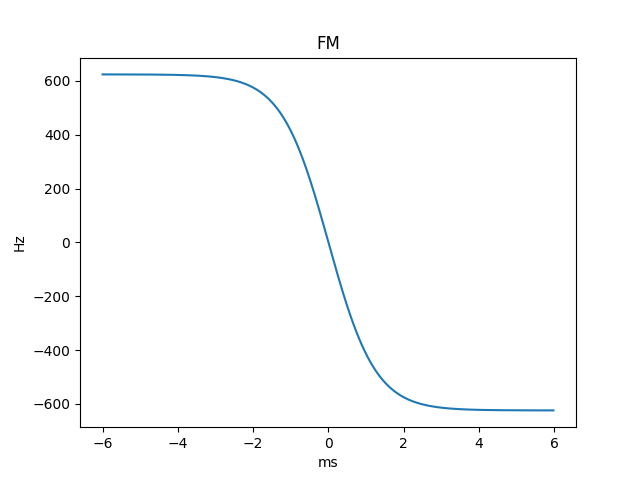

Text(0.5, 1.0, 'FM')

In [7]:
t = np.arange(-T/2,T/2,T/n)*1000
pyplot.figure()
pyplot.plot(t, np.abs(am_sech))
pyplot.xlabel('ms')
pyplot.ylabel('a.u.')
pyplot.title('|AM|')
pyplot.figure()
pyplot.plot(t, om_sech/(2*np.pi))
pyplot.xlabel('ms')
pyplot.ylabel('Hz')
pyplot.title('FM')

<IPython.core.display.Javascript object>


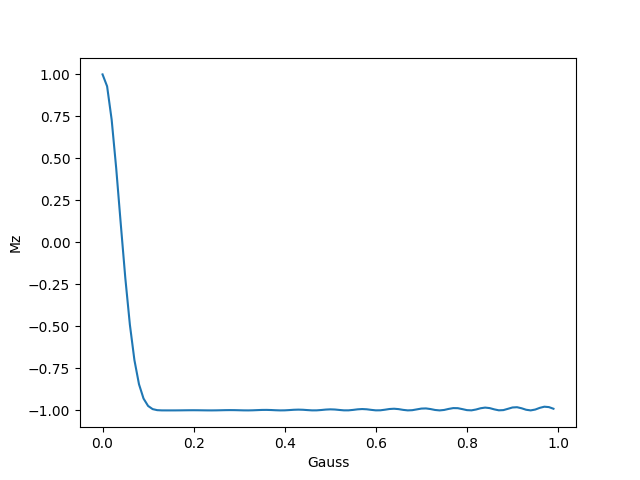

Text(0, 0.5, 'Mz')

In [8]:
a = np.zeros(np.shape(b1), dtype = 'complex')
b = np.zeros(np.shape(b1), dtype = 'complex')
for ii in range(0, np.size(b1)):
    [a[ii], b[ii]] = rf.sim.abrmnd(2*np.pi*(T/n)*4258*b1[ii]*am_sech, np.ones(1), T/n*np.reshape(om_sech,(np.size(om_sech),1)))
Mz = 1-2*np.abs(b)**2
pyplot.figure()
pyplot.plot(b1, Mz)
pyplot.xlabel('Gauss')
pyplot.ylabel('Mz')